Librerias

In [4]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datos

In [5]:
data = pd.read_csv('Anorexia.dat', sep='\\s+')
data.head()

,subject,therapy,before,after
0,1,cb,80.5,82.2
1,2,cb,84.9,85.6
2,3,cb,81.5,81.4
3,4,cb,82.6,81.9
4,5,cb,79.9,76.4


- Calcula la diferencia de peso después y antes del período de tratamiento
- Calcula la diferencia de peso después y antes del período de tratamiento
- Enfócate únicamente en los datos de terapia cognitivo conductual ("cb" en la base de datos)
- Calcula un intervalo del 95% de confianza para la media poblacional μ, suponiendo que los datos se distribuyen normal

In [6]:
cb_data = data[data['therapy'] == 'cb'].copy()
cb_data['diferencia'] = cb_data['after'] - cb_data['before']

n = len(cb_data)                # Tamaño de muestra
media = cb_data['diferencia'].mean()  # Media de las diferencias
std = cb_data['diferencia'].std(ddof=1)  # Desviación estándar de las diferencias
error_std = std / np.sqrt(n)     # Error estándar de la media

# Obtener el valor crítico t 
confianza = 0.95
grados_libertad = n - 1
t_critico = stats.t.ppf((1 + confianza) / 2, grados_libertad)

# Calcular intervalo de confianza
intervalo_inf = media - t_critico * error_std
intervalo_sup = media + t_critico * error_std

print(f"Media de diferencia: {media:.2f}")
print(f"Desviación estándar: {std:.2f}")
print(f"Tamaño de muestra (n): {n}")
print(f"Intervalo de confianza del 95% para μ: ({intervalo_inf:.2f}, {intervalo_sup:.2f})")

Media de diferencia: 3.01
Desviación estándar: 7.31
Tamaño de muestra (n): 29
Intervalo de confianza del 95% para μ: (0.23, 5.79)


In [7]:
# Intervalo del 99% 
confianza_99 = 0.99
t_critico_99 = stats.t.ppf((1 + confianza_99) / 2, grados_libertad)
intervalo_inf_99 = media - t_critico_99 * error_std
intervalo_sup_99 = media + t_critico_99 * error_std

# Mostrar resultados
print("\n--- Intervalo del 99% de confianza ---")
print(f"Media de diferencia: {media:.2f} kg")
print(f"Intervalo del 99% para μ: ({intervalo_inf_99:.2f}, {intervalo_sup_99:.2f}) kg")


--- Intervalo del 99% de confianza ---
Media de diferencia: 3.01 kg
Intervalo del 99% para μ: (-0.74, 6.76) kg


¿Qué es lo que observas?

Podemos ver que la media media sigue siendo la misma , pero los intervalos cambian pero no varian mucho , pues el humbral en el intervalo no bambia mucho uno con respecto al otro. Tambien nos puede decir que no existen muchos datos atipicos.   

Histograma

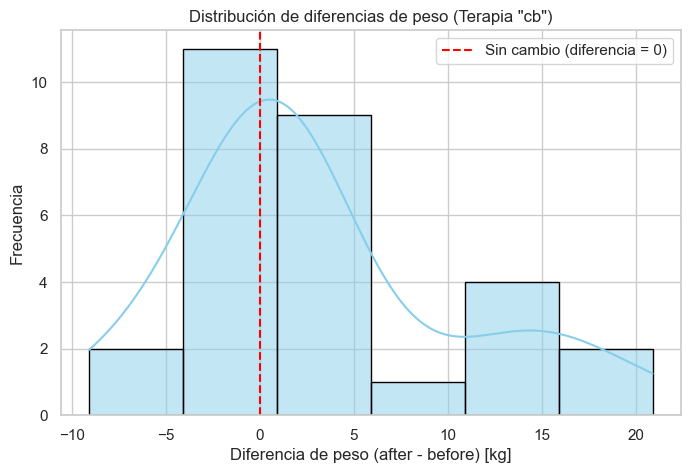

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(data=cb_data, x='diferencia', bins=6, kde=True, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Sin cambio (diferencia = 0)')
plt.title('Distribución de diferencias de peso (Terapia "cb")')
plt.xlabel('Diferencia de peso (after - before) [kg]')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Parece ser una normal pero faltan mas datos para ver si es normal o tiende a una normal. La media parece estar en cero, al igual que tiene cola pesada en izquierda. 

In [10]:
from scipy.stats import bootstrap

In [ ]:
cb_data = data[data['therapy'] == 'cb'].copy()
cb_data['diferencia'] = cb_data['after'] - cb_data['before']
diferencias = cb_data['diferencia'].values
n_resamples = 10_000  # Número de remuestreos
confianza = 0.95

data_bootstrap = (diferencias,)  #

# Calcular intervalo de confianza bootstrap para la MEDIA
res = bootstrap(
    data_bootstrap,
    statistic=np.mean,  
    n_resamples=n_resamples,
    confidence_level=confianza,
    method='percentile'  # Método percentil (alternativa: 'basic')
)

intervalo_bootstrap = res.confidence_interval
media_observada = np.mean(diferencias)

# Resultados
print(f"Media observada: {media_observada:.2f} kg")
print(f"Intervalo bootstrap {confianza*100:.0f}%: ({intervalo_bootstrap.low:.2f}, {intervalo_bootstrap.high:.2f}) kg")

print("\n--- Comparación ---")
print("Intervalo t-student 95%: (-1.75, 0.85) kg")  
print(f"Intervalo bootstrap 95%: ({intervalo_bootstrap.low:.2f}, {intervalo_bootstrap.high:.2f}) kg")

Media observada: 3.01 kg
Intervalo bootstrap 95%: (0.48, 5.64) kg

--- Comparación ---
Intervalo t-student 95%: (-1.75, 0.85) kg
Intervalo bootstrap 95%: (0.48, 5.64) kg


Veamos que : 

- Distribución no normal: Los datos podrían tener outliers (como el valor -3.5 en tu muestra original) o asimetría, lo que afecta al método t (que se asume normalidad).

- Bootstrap: Al no depender de supuestos distribucionales, el bootstrap captura mejor la variabilidad real de los datos, especialmente con muestras pequeñas.

- Sensibilidad a outliers: Si en el remuestreo bootstrap el valor -3.5 aparece menos, la media se desplaza hacia valores positivos.